In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
sns.set()

In [ ]:
humandata = pd.read_table('/content/human_data.txt')
humandata.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


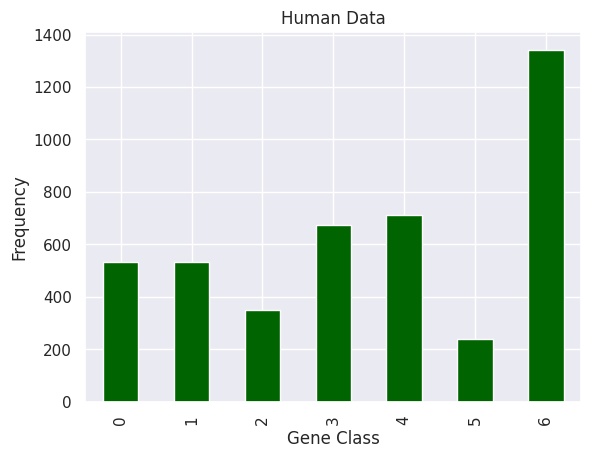

In [ ]:
humandata['class'].value_counts().sort_index().plot.bar(color='darkgreen')
plt.title("Human Data")
plt.xlabel("Gene Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
display(humandata["sequence"][0])

print(f'length of Sequence 1 : {len(humandata["sequence"][0])}')

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

length of Sequence 1 : 207


In [ ]:
!pip install biopython
import Bio

from Bio.Seq import Seq

my_seq = Seq(humandata["sequence"][0])
print(my_seq)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [ ]:
print(f" Complement : {my_seq.complement()} \n")
print(f"Reverse Complement :  {my_seq.reverse_complement()} " )

 Complement : TACGGGGTTGATTTATGATGGCATACCGGGTGGTATTAATGGGGGTATGAGGAATGTGATAAGGAGTAGTGGGTTGATTTTTATAATTTGTGTTTGATGGTGGATGGAGGGAGTGGTTTCGGGTATTTTTATTTTTTAATATTGTTTGGGACTCTTGGTTTTACTTGCTTTTAGACAAGCGAAGTAAGTAACGGGGGTGTTAGGATC 

Reverse Complement :  CTAGGATTGTGGGGGCAATGAATGAAGCGAACAGATTTTCGTTCATTTTGGTTCTCAGGGTTTGTTATAATTTTTTATTTTTATGGGCTTTGGTGAGGGAGGTAGGTGGTAGTTTGTGTTTAATATTTTTAGTTGGGTGATGAGGAATAGTGTAAGGAGTATGGGGGTAATTATGGTGGGCCATACGGTAGTATTTAGTTGGGGCAT 


In [ ]:
from Bio.SeqUtils import GC
print("GC% :\t" + str(GC(my_seq)))

GC% :	39.61352657004831


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [ ]:
humandata["length"] = humandata.sequence.apply(lambda x : len(x))

Text(0, 0.5, 'Frequency')

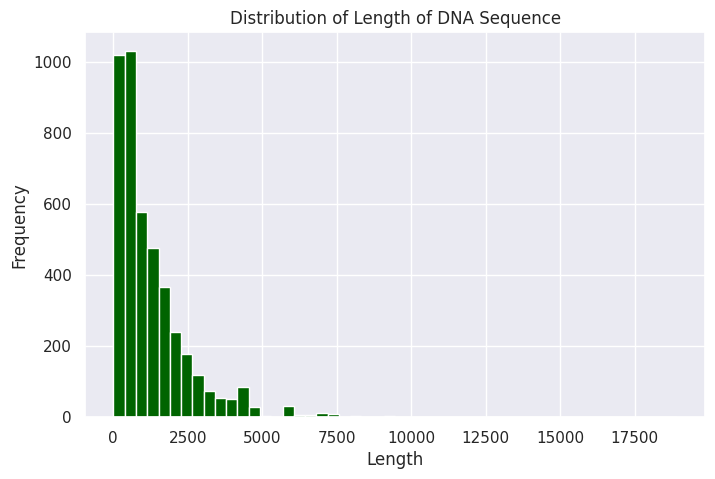

In [ ]:
plt.figure(figsize=(8,5));
plt.hist(humandata["length"],bins=50, color='darkgreen')
plt.title("Distribution of Length of DNA Sequence");
plt.xlabel("Length")
plt.ylabel("Frequency")

In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [ ]:
humandata['words'] = humandata.apply(lambda x: getKmers(x['sequence']), axis=1)

In [ ]:
humandata.head()

,sequence,class,length,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC..."


In [ ]:
humandata["in_string"] =humandata["words"].apply(lambda x:  ' '.join(x))

In [ ]:
humandata[["words","in_string"]]

,words,in_string
0,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...",ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...",ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...",ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...
...,...,...
4375,"[ATGGAA, TGGAAG, GGAAGA, GAAGAT, AAGATT, AGATT...",ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...
4376,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4377,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4378,"[ATGGGG, TGGGGC, GGGGCA, GGGCAC, GGCACC, GCACC...",ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...


In [ ]:
y=humandata.loc[:,'class'].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(humandata["in_string"])

In [ ]:
print(X.shape)

(4380, 232414)


In [ ]:
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


#Training the Human Dataset


In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0   1   2    3    4   5    6
Actual                                  
0          93   0   0    2    1   0    6
1           4  94   0    4    1   0    3
2           0   0  71    1    1   0    5
3           3   0   0  116    0   0    6
4          11   0   0    2  130   0    6
5           3   0   0    1    0  43    4
6          11   0   0    4    0   0  250


In [ ]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
print("Decision Classifier :")
for i, (train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    dt =DecisionTreeClassifier()
    dt.fit(X[train_index],y[train_index])
    pred=dt.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f.    Precision = %.5f    Recall = %.5F" % (accuracy, f1, precision, recall))

Decision Classifier :
0 Iteration : Accuracy = 0.81507     F1_Score = 0.81855.    Precision = 0.82870    Recall = 0.81507
1 Iteration : Accuracy = 0.82078     F1_Score = 0.82528.    Precision = 0.83690    Recall = 0.82078
2 Iteration : Accuracy = 0.80137     F1_Score = 0.80495.    Precision = 0.81816    Recall = 0.80137
3 Iteration : Accuracy = 0.80936     F1_Score = 0.81665.    Precision = 0.83851    Recall = 0.80936
4 Iteration : Accuracy = 0.79680     F1_Score = 0.80248.    Precision = 0.82244    Recall = 0.79680


In [ ]:
print("Random Forest Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f.    Precision = %.5f    Recall = %.5F" % (accuracy, f1, precision, recall))

Random Forest Classifier :
0 Iteration : Accuracy = 0.89726     F1_Score = 0.89862.    Precision = 0.90752    Recall = 0.89726
1 Iteration : Accuracy = 0.91895     F1_Score = 0.91993.    Precision = 0.92735    Recall = 0.91895
2 Iteration : Accuracy = 0.89840     F1_Score = 0.90061.    Precision = 0.91497    Recall = 0.89840
3 Iteration : Accuracy = 0.91324     F1_Score = 0.91397.    Precision = 0.92163    Recall = 0.91324
4 Iteration : Accuracy = 0.89269     F1_Score = 0.89709.    Precision = 0.91714    Recall = 0.89269


In [ ]:
print("Naive Bayes Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f.    Precision = %.5f    Recall = %.5F" % (accuracy, f1, precision, recall))

Naive Bayes Classifier :
0 Iteration : Accuracy = 0.98059     F1_Score = 0.98061.    Precision = 0.98114    Recall = 0.98059
1 Iteration : Accuracy = 0.98059     F1_Score = 0.98066.    Precision = 0.98146    Recall = 0.98059
2 Iteration : Accuracy = 0.97603     F1_Score = 0.97606.    Precision = 0.97664    Recall = 0.97603
3 Iteration : Accuracy = 0.97717     F1_Score = 0.97722.    Precision = 0.97807    Recall = 0.97717
4 Iteration : Accuracy = 0.97717     F1_Score = 0.97715.    Precision = 0.97809    Recall = 0.97717


In [ ]:
from sklearn import svm

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
print("Support Vector Machine :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
      svm_classifier = SVC(kernel='rbf')
      svm_classifier.fit(X[train_index],y[train_index])
      pred=svm_classifier.predict(X[val_index])
      accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
      print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f.    Precision = %.5f    Recall = %.5F" % (accuracy, f1, precision, recall))

Support Vector Machine :
0 Iteration : Accuracy = 0.81393     F1_Score = 0.82012.    Precision = 0.88430    Recall = 0.81393
1 Iteration : Accuracy = 0.82306     F1_Score = 0.82949.    Precision = 0.88790    Recall = 0.82306
2 Iteration : Accuracy = 0.79909     F1_Score = 0.80643.    Precision = 0.87742    Recall = 0.79909
3 Iteration : Accuracy = 0.82763     F1_Score = 0.83366.    Precision = 0.88866    Recall = 0.82763
4 Iteration : Accuracy = 0.80594     F1_Score = 0.81117.    Precision = 0.87884    Recall = 0.80594


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
print("KNN :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
      knn_model = KNeighborsClassifier(n_neighbors=5)
      knn_model.fit(X[train_index],y[train_index])
      pred=knn_model.predict(X[val_index])
      accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
      print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f.    Precision = %.5f    Recall = %.5F" % (accuracy, f1, precision, recall))

KNN :
0 Iteration : Accuracy = 0.75913     F1_Score = 0.78920.    Precision = 0.88947    Recall = 0.75913
1 Iteration : Accuracy = 0.83676     F1_Score = 0.83871.    Precision = 0.87986    Recall = 0.83676
2 Iteration : Accuracy = 0.71689     F1_Score = 0.76427.    Precision = 0.91311    Recall = 0.71689
3 Iteration : Accuracy = 0.82648     F1_Score = 0.82816.    Precision = 0.87494    Recall = 0.82648
4 Iteration : Accuracy = 0.74658     F1_Score = 0.77379.    Precision = 0.87353    Recall = 0.74658


In [ ]:
import xgboost as xgb

In [ ]:
print("XG Boost :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
      xgc = xgb.XGBClassifier()
      xgc.fit(X[train_index],y[train_index])
      pred=xgc.predict(X[val_index])
      accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
      print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f.    Precision = %.5f    Recall = %.5F" % (accuracy, f1, precision, recall))

XG Boost :
0 Iteration : Accuracy = 0.88813     F1_Score = 0.88737.    Precision = 0.89715    Recall = 0.88813
1 Iteration : Accuracy = 0.89954     F1_Score = 0.90051.    Precision = 0.91278    Recall = 0.89954
2 Iteration : Accuracy = 0.89155     F1_Score = 0.89287.    Precision = 0.90743    Recall = 0.89155
3 Iteration : Accuracy = 0.88813     F1_Score = 0.88897.    Precision = 0.90241    Recall = 0.88813
4 Iteration : Accuracy = 0.89840     F1_Score = 0.89893.    Precision = 0.90630    Recall = 0.89840


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
print("Ada Boost :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
      ada = AdaBoostClassifier(n_estimators=6000, learning_rate=1.8, random_state=42)
      ada.fit(X[train_index],y[train_index])
      pred=ada.predict(X[val_index])
      accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
      print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f.    Precision = %.5f    Recall = %.5F" % (accuracy, f1, precision, recall))

Ada Boost :
0 Iteration : Accuracy = 0.81621     F1_Score = 0.81729.    Precision = 0.82643    Recall = 0.81621
1 Iteration : Accuracy = 0.84018     F1_Score = 0.84132.    Precision = 0.85130    Recall = 0.84018
2 Iteration : Accuracy = 0.84475     F1_Score = 0.84674.    Precision = 0.85992    Recall = 0.84475
3 Iteration : Accuracy = 0.83105     F1_Score = 0.83271.    Precision = 0.85043    Recall = 0.83105
4 Iteration : Accuracy = 0.84589     F1_Score = 0.84589.    Precision = 0.85485    Recall = 0.84589


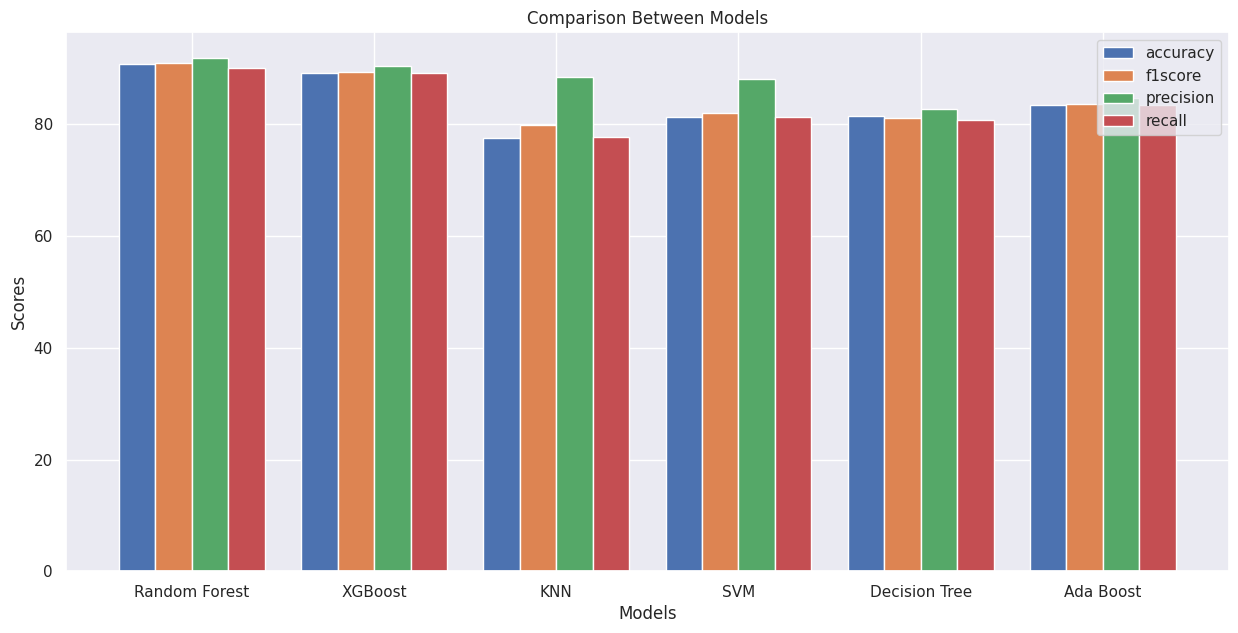

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,7))

scores=["Random Forest","XGBoost","KNN","SVM","Decision Tree","Ada Boost"]
accscore=[90.9,89.12,77.6,81.3,81.5,83.5]
f1score=[91.06,89.3,79.84,81.98,81.1,83.6]
precision=[91.9,90.4,88.5,88.2,82.8,84.7]
recall=[90.1,89.2,77.66,81.34,80.78,83.5]

w=0.2

bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]
bar3=[i+2*w for i in bar1]
bar4=[i+3*w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.bar(bar3,precision,w,label="precision")
plt.bar(bar4,recall,w,label="recall")

plt.xticks(bar1+w*1.5, scores)
plt.legend()
plt.title("Comparison Between Models")

plt.xlabel("Models")
plt.ylabel("Scores")

plt.show()


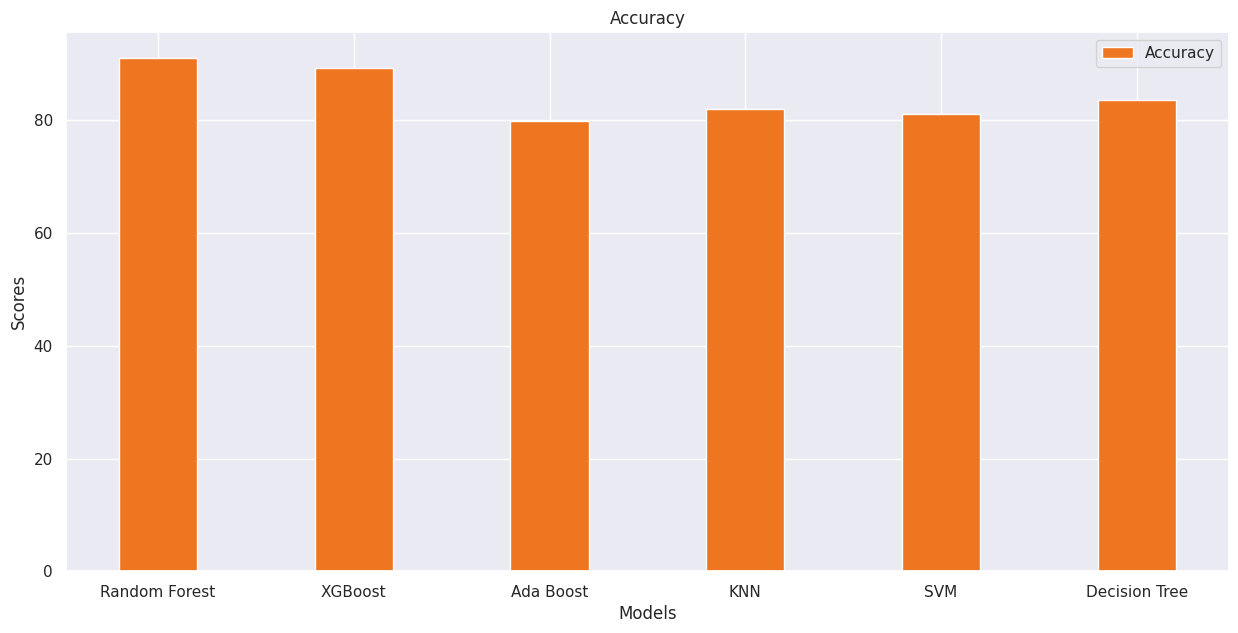

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 7))

scores = ["Random Forest", "XGBoost", "Ada Boost", "KNN", "SVM", "Decision Tree"]
accscore=[90.9,89.12,77.6,81.3,81.5,83.5]

w = 0.4

bar1 = np.arange(len(scores))

plt.bar(bar1, f1score, w, label="Accuracy", color='#EE7621')

plt.xticks(bar1, scores)
plt.legend()
plt.title("Accuracy")

plt.xlabel("Models")
plt.ylabel("Scores")

plt.show()

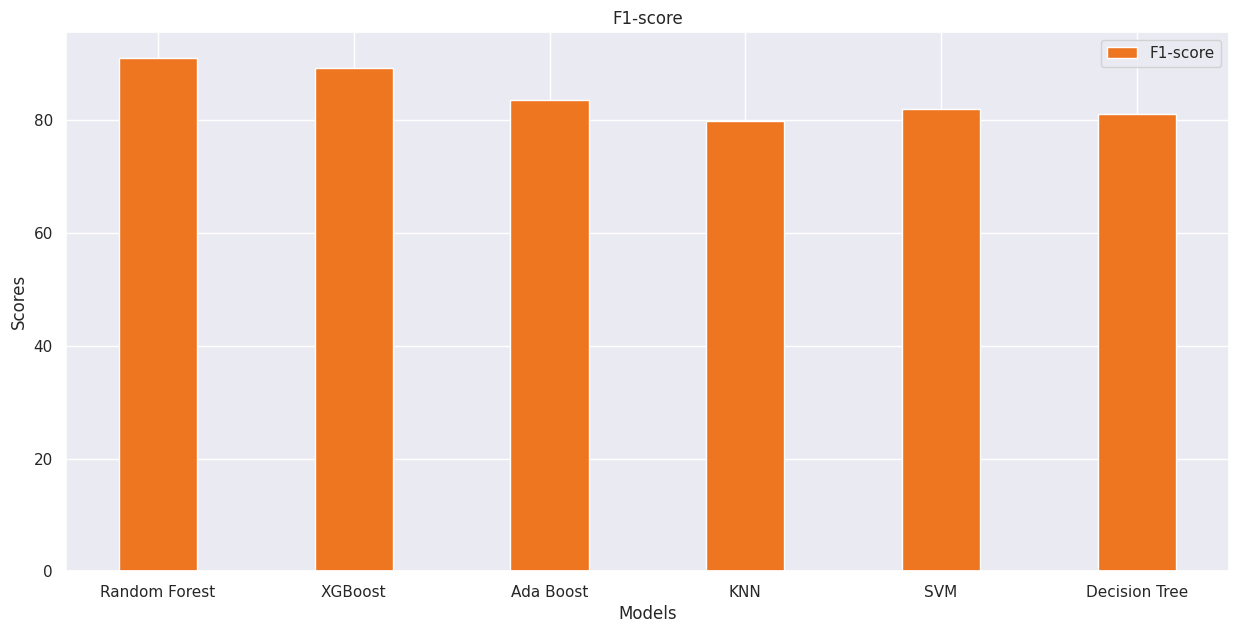

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 7))

scores = ["Random Forest", "XGBoost", "Ada Boost", "KNN", "SVM", "Decision Tree"]
f1score = [91.06, 89.3, 83.6, 79.84, 81.98, 81.1]

w = 0.4

bar1 = np.arange(len(scores))

plt.bar(bar1, f1score, w, label="F1-score", color='#EE7621')

plt.xticks(bar1, scores)
plt.legend()
plt.title("F1-score")

plt.xlabel("Models")
plt.ylabel("Scores")

plt.show()

#Testing

In [ ]:
chimp = pd.read_table('/content/chimp_data.txt')

chimp.head()


,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
dog = pd.read_table('/content/dog_data.txt')
dog.head()


,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [ ]:
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)

In [ ]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 1].values

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 1].values

In [ ]:
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [ ]:
print(X_chimp.shape)
print(X_dog.shape)

(1682, 232414)
(820, 232414)


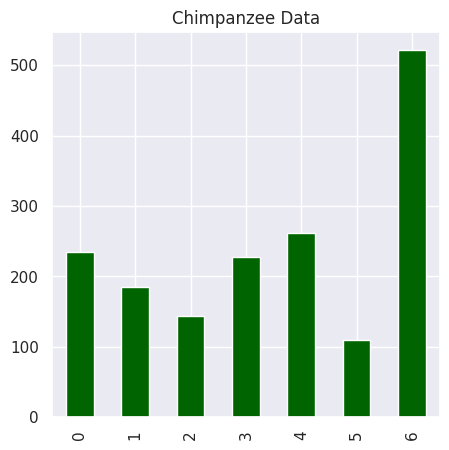

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
chimp['class'].value_counts().sort_index().plot.bar(color='darkgreen')
plt.title("Chimpanzee Data");




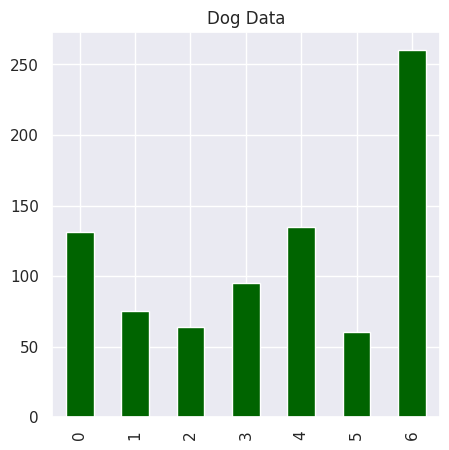

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
dog['class'].value_counts().sort_index().plot.bar(color='darkgreen')
plt.title("Dog Data");

In [ ]:
y_pred_chimp = rf.predict(X_chimp)
y_pred_dog = rf.predict(X_dog)

In [ ]:
y_prediction_chimp = xgc.predict(X_chimp)
y_prediction_dog = xgc.predict(X_dog)

#Performance on Human gene




In [ ]:
y_pred = rf.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Predicted   0   1   2    3    4   5    6
Actual                                  
0          89   0   0    4    2   0    7
1           2  96   0    4    0   0    4
2           0   0  70    2    0   0    6
3           0   0   0  119    1   0    5
4           4   0   0    8  131   0    6
5           1   0   0    2    0  44    4
6           6   0   0    6    0   0  253
Accuracy: 0.9155251141552512


<Axes: xlabel='Predicted', ylabel='Actual'>

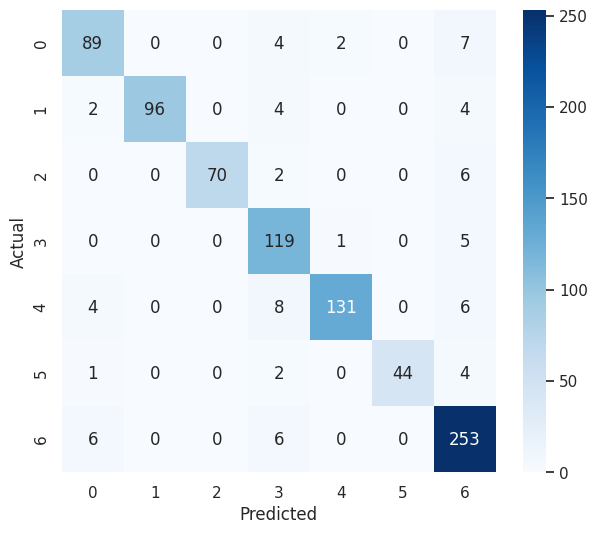

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="Blues",annot=True,fmt='d')

In [ ]:
y_prediction = xgc.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Predicted    0    1   2    3    4   5    6
Actual                                    
0          100    0   0    0    0   0    2
1            0  105   0    0    0   0    1
2            0    0  77    0    0   0    1
3            0    0   0  124    0   0    1
4            1    0   0    0  146   0    2
5            0    0   0    0    0  49    2
6            0    1   1    0    2   0  261
Accuracy: 0.9840182648401826


<Axes: xlabel='Predicted', ylabel='Actual'>

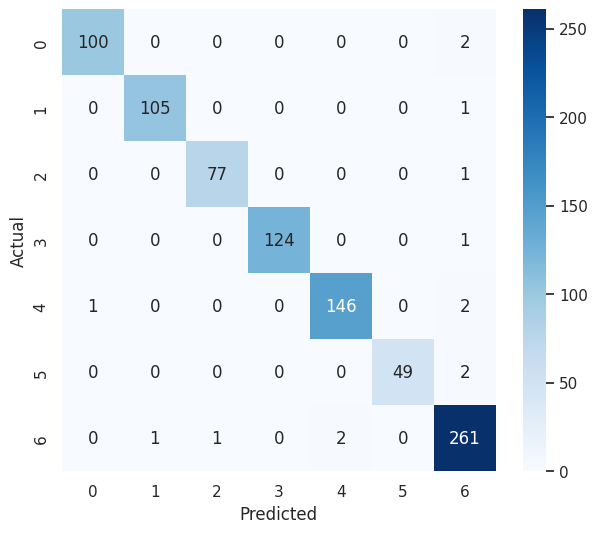

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="Blues",annot=True,fmt='d')

#Performance on Chimpanzee's Gene

In [ ]:
#rf
from sklearn.metrics import precision_recall_curve
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))



Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          228    0    0    3    0    0    3
1            0  183    0    0    0    0    2
2            0    0  143    0    0    0    1
3            0    0    0  224    2    0    2
4            4    0    0    5  249    0    3
5            0    0    0    0    0  108    1
6            0    0    0    1    0    0  520
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [ ]:
#XG
from sklearn.metrics import precision_recall_curve
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_prediction_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_prediction_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          226    1    1    1    1    0    4
1            0  183    0    0    0    0    2
2            0    1  140    0    1    0    2
3            0    0    0  219    0    0    9
4            3    0    0    0  254    0    4
5            0    0    0    1    0  107    1
6            2    1    2    1    2    0  513
accuracy = 0.976 
precision = 0.976 
recall = 0.976 
f1 = 0.976


In [ ]:
import seaborn as sns

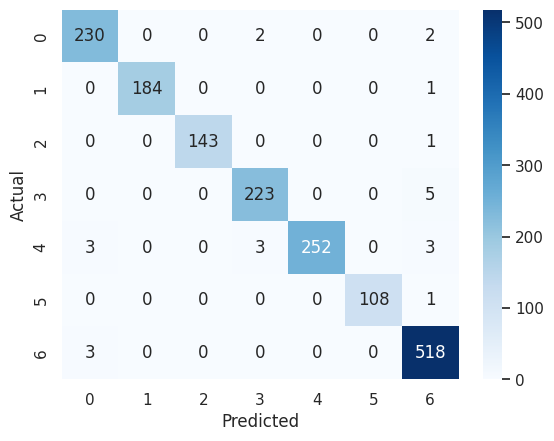

In [ ]:
#rf
confusion_matrix = pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted'))


sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

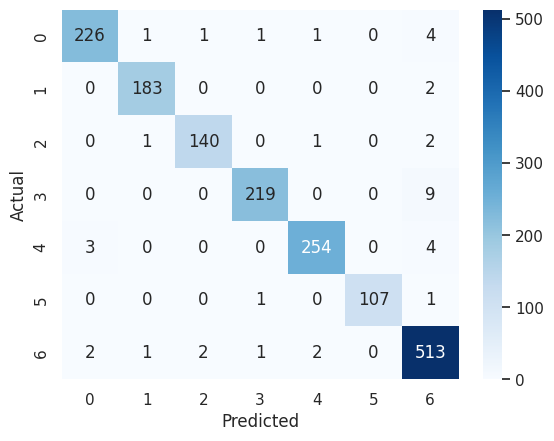

In [ ]:
#xg
confusion_matrix = pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_prediction_chimp, name='Predicted'))


sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Performance on Dog's Gene

In [ ]:
#rf
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))



Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          105   0   0   3    6   0   17
1            0  56   0   6    1   0   12
2            1   0  50   2    1   0   10
3            5   0   0  74    3   0   13
4            2   0   0   7  100   0   26
5            9   0   0   2    0  28   21
6            0   0   0   0    1   0  259
accuracy = 0.820 
precision = 0.848 
recall = 0.820 
f1 = 0.816


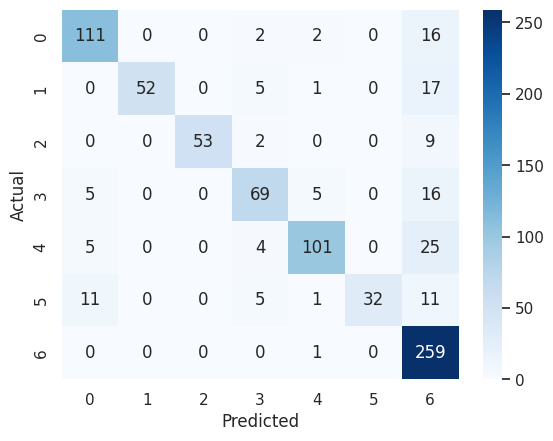

In [ ]:
confusion_matrix = pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted'))


sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#xg
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_prediction_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_prediction_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          93   6   0   4   5   0   23
1           0  64   0   3   3   0    5
2           2   0  46   0   3   0   13
3           2   0   2  56  12   0   23
4           3   2   2   5  88   0   35
5           3   1   0   1   7  35   13
6           6   1   0   9  13   0  231
accuracy = 0.748 
precision = 0.768 
recall = 0.748 
f1 = 0.746


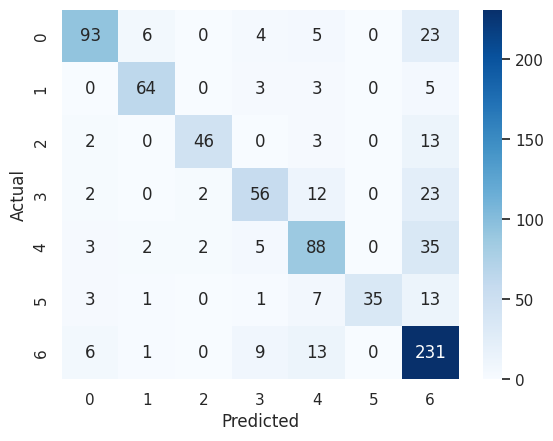

In [ ]:
confusion_matrix = pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_prediction_dog, name='Predicted'))


sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()